# Data Preparation for Modeling

This notebook prepares the passengers enriched data for machine learning modeling by:
1. Dropping redundant fields
2. Converting date to numerical and cyclical features
3. Creating weekend boolean field
4. Converting event type to boolean
5. Handling null values in toilet fields
6. Filling null values in service and parking fields with appropriate statistics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# mostrar todas las columnas
pd.set_option('display.max_columns', None)

## Load the Data

In [4]:
# Load the passengers enriched data
df_original = pd.read_csv('../data/processed/passengers_enriched_2023.csv', low_memory=False)

print(f"Original dataset shape: {df_original.shape}")
print(f"\nColumn names: {df_original.columns.tolist()}")
print(f"\nData types:")
print(df_original.dtypes)

Original dataset shape: (147103, 32)

Column names: ['date', 'dayofweek', 'station_name', 'station_uid', 'mode', 'line', 'farezones', 'hubnaptancode', 'entrytapcount', 'exittapcount', 'event_type', 'event_name', 'expected_attendance', 'max_temp', 'min_temp', 'mean_temp', 'precipitation_amount', 'relative_humidity', 'cloud_cover', 'sunshine_duration', 'sea_level_pressure', 'service_operated_allweek_pct', 'service_operated_weekday_pct', 'service_operated_weekend_pct', 'kilometres_operated', 'wifi', 'airportinterchange', 'bluebadgecarparking', 'bluebadgecarparkspaces', 'toilet_isaccessible', 'toilet_isfeecharged', 'toilet_type']

Data types:
date                             object
dayofweek                        object
station_name                     object
station_uid                      object
mode                             object
line                             object
farezones                        object
hubnaptancode                    object
entrytapcount                    

In [6]:
# Display first few rows
df_original.head()

,date,dayofweek,station_name,station_uid,mode,line,farezones,hubnaptancode,entrytapcount,exittapcount,event_type,event_name,expected_attendance,max_temp,min_temp,mean_temp,precipitation_amount,relative_humidity,cloud_cover,sunshine_duration,sea_level_pressure,service_operated_allweek_pct,service_operated_weekday_pct,service_operated_weekend_pct,kilometres_operated,wifi,airportinterchange,bluebadgecarparking,bluebadgecarparkspaces,toilet_isaccessible,toilet_isfeecharged,toilet_type
0,2023-01-01,Sunday,Acton Central,910GACTNCTL,overground,mildmay,3,NaN,779,709,NaN,NaN,NaN,13.4,5.2,7.2,4.6,81.0,7.0,0.0,1008.0,NaN,NaN,NaN,NaN,True,NaN,False,0.0,NaN,NaN,NaN
1,2023-01-02,Monday,Acton Central,910GACTNCTL,overground,mildmay,3,NaN,1077,1135,NaN,NaN,NaN,13.4,5.2,7.2,0.4,86.0,3.0,5.2,1016.9,NaN,NaN,NaN,NaN,True,NaN,False,0.0,NaN,NaN,NaN
2,2023-01-03,Tuesday,Acton Central,910GACTNCTL,overground,mildmay,3,NaN,735,597,NaN,NaN,NaN,13.9,2.1,7.8,3.0,93.0,7.0,0.0,1018.6,NaN,NaN,NaN,NaN,True,NaN,False,0.0,NaN,NaN,NaN
3,2023-01-04,Wednesday,Acton Central,910GACTNCTL,overground,mildmay,3,NaN,818,735,NaN,NaN,NaN,13.5,9.2,11.6,0.2,82.0,6.0,0.4,1014.6,NaN,NaN,NaN,NaN,True,NaN,False,0.0,NaN,NaN,NaN
4,2023-01-05,Thursday,Acton Central,910GACTNCTL,overground,mildmay,3,NaN,1237,1247,NaN,NaN,NaN,12.7,8.9,11.2,2.4,82.0,8.0,0.4,1018.6,NaN,NaN,NaN,NaN,True,NaN,False,0.0,NaN,NaN,NaN


## Create a Copy for Processing


In [9]:
# Create a copy of the dataframe for processing
df = df_original.copy()
print(f"Working dataset shape: {df.shape}")

Working dataset shape: (147103, 32)


## 1. Drop Redundant Fields


In [12]:
# Fields to drop as specified (including toilet_type as requested)
fields_to_drop = ['airportinterchange', 'hubnaptancode', 'station_name', 'mode', 'event_name', 'toilet_type']

print(f"Fields to drop: {fields_to_drop}")
print(f"Shape before dropping: {df.shape}")

# Drop the fields
df = df.drop(columns=fields_to_drop)

print(f"Shape after dropping: {df.shape}")
print(f"Remaining columns: {df.columns.tolist()}")

Fields to drop: ['airportinterchange', 'hubnaptancode', 'station_name', 'mode', 'event_name', 'toilet_type']
Shape before dropping: (147103, 32)
Shape after dropping: (147103, 26)
Remaining columns: ['date', 'dayofweek', 'station_uid', 'line', 'farezones', 'entrytapcount', 'exittapcount', 'event_type', 'expected_attendance', 'max_temp', 'min_temp', 'mean_temp', 'precipitation_amount', 'relative_humidity', 'cloud_cover', 'sunshine_duration', 'sea_level_pressure', 'service_operated_allweek_pct', 'service_operated_weekday_pct', 'service_operated_weekend_pct', 'kilometres_operated', 'wifi', 'bluebadgecarparking', 'bluebadgecarparkspaces', 'toilet_isaccessible', 'toilet_isfeecharged']


## 2. Convert Date to Numerical and Cyclical Features


In [15]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract numerical features from date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear

# Create cyclical features for month and day of year
# Month cyclical features (12 months)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Day of year cyclical features (365/366 days)
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

print("Date features created:")
print(df[['date', 'year', 'month', 'day', 'day_of_year', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos']].head())

Date features created:
        date  year  month  day  day_of_year  month_sin  month_cos  \
0 2023-01-01  2023      1    1            1        0.5   0.866025   
1 2023-01-02  2023      1    2            2        0.5   0.866025   
2 2023-01-03  2023      1    3            3        0.5   0.866025   
3 2023-01-04  2023      1    4            4        0.5   0.866025   
4 2023-01-05  2023      1    5            5        0.5   0.866025   

   day_of_year_sin  day_of_year_cos  
0         0.017213         0.999852  
1         0.034422         0.999407  
2         0.051620         0.998667  
3         0.068802         0.997630  
4         0.085965         0.996298  


## 3. Create Weekend Boolean Field


In [18]:
# Create is_weekend boolean field
# Weekend is Saturday (5) and Sunday (6) in pandas weekday (Monday=0)
df['is_weekend'] = df['date'].dt.weekday.isin([5, 6])

print("Weekend distribution:")
print(df['is_weekend'].value_counts())
print(f"\nPercentage of weekend days: {df['is_weekend'].mean()*100:.2f}%")

# Verify with dayofweek column
print("\nVerification with dayofweek column:")
print(pd.crosstab(df['dayofweek'], df['is_weekend']))


Weekend distribution:
is_weekend
False    105218
True      41885
Name: count, dtype: int64

Percentage of weekend days: 28.47%

Verification with dayofweek column:
is_weekend  False  True 
dayofweek               
Friday      21171      0
Monday      20773      0
Saturday        0  20840
Sunday          0  21045
Thursday    21179      0
Tuesday     21093      0
Wednesday   21002      0


## 4. Convert Event Type to Boolean


In [21]:
# Check current event_type values
print("Current event_type values:")
print(df['event_type'].value_counts(dropna=False))
print(f"\nNull values in event_type: {df['event_type'].isnull().sum()}")
print(f"Total rows: {len(df)}")


Current event_type values:
event_type
NaN                              142506
Concierto masivo                   3052
Evento deportivo                    448
Evento cultural                     340
Festivo                             309
Festival/Evento al aire libre       256
Evento deportivo/espectáculo        110
Evento deportivo/benéfico            82
Name: count, dtype: int64

Null values in event_type: 142506
Total rows: 147103


In [23]:
# Create is_event boolean field
# If there is an event (not null), then 1, else 0
df['is_event'] = df['event_type'].notna().astype(int)

print("Event distribution:")
print(df['is_event'].value_counts())
print(f"\nPercentage of days with events: {df['is_event'].mean()*100:.2f}%")

# Fill ALL null values in expected_attendance with 0
print(f"\nExpected attendance nulls before filling: {df['expected_attendance'].isnull().sum()}")
df['expected_attendance'] = df['expected_attendance'].fillna(0)
print(f"Expected attendance nulls after filling: {df['expected_attendance'].isnull().sum()}")

print(f"\nExpected attendance after filling all nulls with 0:")
print(df['expected_attendance'].describe())


Event distribution:
is_event
0    142506
1      4597
Name: count, dtype: int64

Percentage of days with events: 3.13%

Expected attendance nulls before filling: 144824
Expected attendance nulls after filling: 0

Expected attendance after filling all nulls with 0:
count    1.471030e+05
mean     2.392324e+03
std      4.294569e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+06
Name: expected_attendance, dtype: float64


## 5. Fill Null Toilet Fields


In [26]:
# Check current toilet field values (toilet_type was dropped)
print("Current toilet field values:")
print("\ntoilet_isaccessible:")
print(df['toilet_isaccessible'].value_counts(dropna=False))
print("\ntoilet_isfeecharged:")
print(df['toilet_isfeecharged'].value_counts(dropna=False))


Current toilet field values:

toilet_isaccessible:
toilet_isaccessible
NaN      90858
True     32367
False    23878
Name: count, dtype: int64

toilet_isfeecharged:
toilet_isfeecharged
NaN      90858
False    54422
True      1823
Name: count, dtype: int64


In [28]:
# Fill remaining toilet fields with 'unknown' (toilet_type was dropped)
toilet_columns = ['toilet_isaccessible', 'toilet_isfeecharged']

for col in toilet_columns:
    df[col] = df[col].fillna('unknown')
    print(f"\n{col} after filling:")
    print(df[col].value_counts())



toilet_isaccessible after filling:
toilet_isaccessible
unknown    90858
True       32367
False      23878
Name: count, dtype: int64

toilet_isfeecharged after filling:
toilet_isfeecharged
unknown    90858
False      54422
True        1823
Name: count, dtype: int64


## 6. Analyze and Fill Service/Parking Fields


## Final Column Organization


In [32]:
# Drop remaining temporal fields and reorganize columns for ML
print("Before final organization:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Drop date and dayofweek as they're no longer needed (we have engineered features)
final_fields_to_drop = ['date', 'dayofweek', 'event_type']
print(f"\nDropping final fields: {final_fields_to_drop}")
df = df.drop(columns=final_fields_to_drop)

# Organize columns in logical order for machine learning
# 1. Identifiers
id_cols = ['station_uid', 'line', 'farezones']

# 2. Target/Response variables (passenger counts)
target_cols = ['entrytapcount', 'exittapcount']

# 3. Temporal features (engineered from date)
temporal_cols = ['year', 'month', 'day', 'day_of_year', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'is_weekend']

# 4. Event features
event_cols = ['is_event', 'expected_attendance']

# 5. Weather features
weather_cols = ['max_temp', 'min_temp', 'mean_temp', 'precipitation_amount', 'relative_humidity', 'cloud_cover', 'sunshine_duration', 'sea_level_pressure']

# 6. Service/Performance features
service_cols = ['service_operated_allweek_pct', 'service_operated_weekday_pct', 'service_operated_weekend_pct', 'kilometres_operated']

# 7. Station amenities
amenity_cols = ['wifi', 'bluebadgecarparking', 'bluebadgecarparkspaces', 'toilet_isaccessible', 'toilet_isfeecharged']

# Combine in logical order
ordered_columns = id_cols + target_cols + temporal_cols + event_cols + weather_cols + service_cols + amenity_cols

# Reorder dataframe
df = df[ordered_columns]

print(f"\nAfter final organization:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nColumn groups:")
print(f"  Identifiers ({len(id_cols)}): {id_cols}")
print(f"  Targets ({len(target_cols)}): {target_cols}")
print(f"  Temporal ({len(temporal_cols)}): {temporal_cols}")
print(f"  Events ({len(event_cols)}): {event_cols}")
print(f"  Weather ({len(weather_cols)}): {weather_cols}")
print(f"  Service ({len(service_cols)}): {service_cols}")
print(f"  Amenities ({len(amenity_cols)}): {amenity_cols}")


Before final organization:
Shape: (147103, 36)
Columns: ['date', 'dayofweek', 'station_uid', 'line', 'farezones', 'entrytapcount', 'exittapcount', 'event_type', 'expected_attendance', 'max_temp', 'min_temp', 'mean_temp', 'precipitation_amount', 'relative_humidity', 'cloud_cover', 'sunshine_duration', 'sea_level_pressure', 'service_operated_allweek_pct', 'service_operated_weekday_pct', 'service_operated_weekend_pct', 'kilometres_operated', 'wifi', 'bluebadgecarparking', 'bluebadgecarparkspaces', 'toilet_isaccessible', 'toilet_isfeecharged', 'year', 'month', 'day', 'day_of_year', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'is_weekend', 'is_event']

Dropping final fields: ['date', 'dayofweek', 'event_type']

After final organization:
Shape: (147103, 33)
Columns: ['station_uid', 'line', 'farezones', 'entrytapcount', 'exittapcount', 'year', 'month', 'day', 'day_of_year', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'is_weekend', 'is_event', 'expected_

## Final Dataset Summary


In [35]:
# Display final dataset info
print("=== FINAL DATASET READY FOR MODELING ===")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"\nDataset info:")
print(df.info())

# Final null check
null_counts = df.isnull().sum()
total_nulls = null_counts.sum()
if total_nulls == 0:
    print("\n✅ SUCCESS: Dataset is ready for modeling - no null values!")
else:
    print(f"\n⚠️ WARNING: {total_nulls} null values remaining:")
    print(null_counts[null_counts > 0])


=== FINAL DATASET READY FOR MODELING ===
Shape: (147103, 33)
Columns: 33

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147103 entries, 0 to 147102
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   station_uid                   147103 non-null  object 
 1   line                          147103 non-null  object 
 2   farezones                     147103 non-null  object 
 3   entrytapcount                 147103 non-null  int64  
 4   exittapcount                  147103 non-null  int64  
 5   year                          147103 non-null  int32  
 6   month                         147103 non-null  int32  
 7   day                           147103 non-null  int32  
 8   day_of_year                   147103 non-null  int32  
 9   month_sin                     147103 non-null  float64
 10  month_cos                     147103 non-null  float64
 11  day_of_year_sin 

In [37]:
# Display sample of final prepared data
print("Sample of final prepared data:")
df.head()


Sample of final prepared data:


,station_uid,line,farezones,entrytapcount,exittapcount,year,month,day,day_of_year,month_sin,month_cos,day_of_year_sin,day_of_year_cos,is_weekend,is_event,expected_attendance,max_temp,min_temp,mean_temp,precipitation_amount,relative_humidity,cloud_cover,sunshine_duration,sea_level_pressure,service_operated_allweek_pct,service_operated_weekday_pct,service_operated_weekend_pct,kilometres_operated,wifi,bluebadgecarparking,bluebadgecarparkspaces,toilet_isaccessible,toilet_isfeecharged
0,910GACTNCTL,mildmay,3,779,709,2023,1,1,1,0.5,0.866025,0.017213,0.999852,True,0,0.0,13.4,5.2,7.2,4.6,81.0,7.0,0.0,1008.0,NaN,NaN,NaN,NaN,True,False,0.0,unknown,unknown
1,910GACTNCTL,mildmay,3,1077,1135,2023,1,2,2,0.5,0.866025,0.034422,0.999407,False,0,0.0,13.4,5.2,7.2,0.4,86.0,3.0,5.2,1016.9,NaN,NaN,NaN,NaN,True,False,0.0,unknown,unknown
2,910GACTNCTL,mildmay,3,735,597,2023,1,3,3,0.5,0.866025,0.051620,0.998667,False,0,0.0,13.9,2.1,7.8,3.0,93.0,7.0,0.0,1018.6,NaN,NaN,NaN,NaN,True,False,0.0,unknown,unknown
3,910GACTNCTL,mildmay,3,818,735,2023,1,4,4,0.5,0.866025,0.068802,0.997630,False,0,0.0,13.5,9.2,11.6,0.2,82.0,6.0,0.4,1014.6,NaN,NaN,NaN,NaN,True,False,0.0,unknown,unknown
4,910GACTNCTL,mildmay,3,1237,1247,2023,1,5,5,0.5,0.866025,0.085965,0.996298,False,0,0.0,12.7,8.9,11.2,2.4,82.0,8.0,0.4,1018.6,NaN,NaN,NaN,NaN,True,False,0.0,unknown,unknown


In [41]:
# Fields to analyze for null filling
numeric_fields = ['service_operated_allweek_pct', 'service_operated_weekday_pct', 
                 'service_operated_weekend_pct', 'kilometres_operated', 'bluebadgecarparkspaces']

print("Analysis of numeric fields with null values:")
for field in numeric_fields:
    if field in df.columns:
        null_count = df[field].isnull().sum()
        total_count = len(df)
        null_percentage = (null_count / total_count) * 100
        
        print(f"\n{field}:")
        print(f"  Null values: {null_count} ({null_percentage:.2f}%)")
        
        if null_count < total_count:  # If there are non-null values
            mean_val = df[field].mean()
            median_val = df[field].median()
            std_val = df[field].std()
            
            print(f"  Mean: {mean_val:.2f}")
            print(f"  Median: {median_val:.2f}")
            print(f"  Std: {std_val:.2f}")
            print(f"  Skewness: {df[field].skew():.2f}")
            
            # Recommend median if highly skewed, mean otherwise
            if abs(df[field].skew()) > 1:
                print(f"  Recommendation: Use MEDIAN (data is skewed)")
            else:
                print(f"  Recommendation: Use MEAN (data is relatively normal)")


Analysis of numeric fields with null values:

service_operated_allweek_pct:
  Null values: 67451 (45.85%)
  Mean: 90.20
  Median: 90.60
  Std: 4.82
  Skewness: -0.54
  Recommendation: Use MEAN (data is relatively normal)

service_operated_weekday_pct:
  Null values: 67451 (45.85%)
  Mean: 90.91
  Median: 91.50
  Std: 4.71
  Skewness: -0.63
  Recommendation: Use MEAN (data is relatively normal)

service_operated_weekend_pct:
  Null values: 67451 (45.85%)
  Mean: 88.18
  Median: 88.40
  Std: 6.03
  Skewness: -0.48
  Recommendation: Use MEAN (data is relatively normal)

kilometres_operated:
  Null values: 52615 (35.77%)
  Mean: 190892.97
  Median: 196661.00
  Std: 72314.00
  Skewness: -0.36
  Recommendation: Use MEAN (data is relatively normal)

bluebadgecarparkspaces:
  Null values: 364 (0.25%)
  Mean: 0.47
  Median: 0.00
  Std: 1.86
  Skewness: 5.77
  Recommendation: Use MEDIAN (data is skewed)


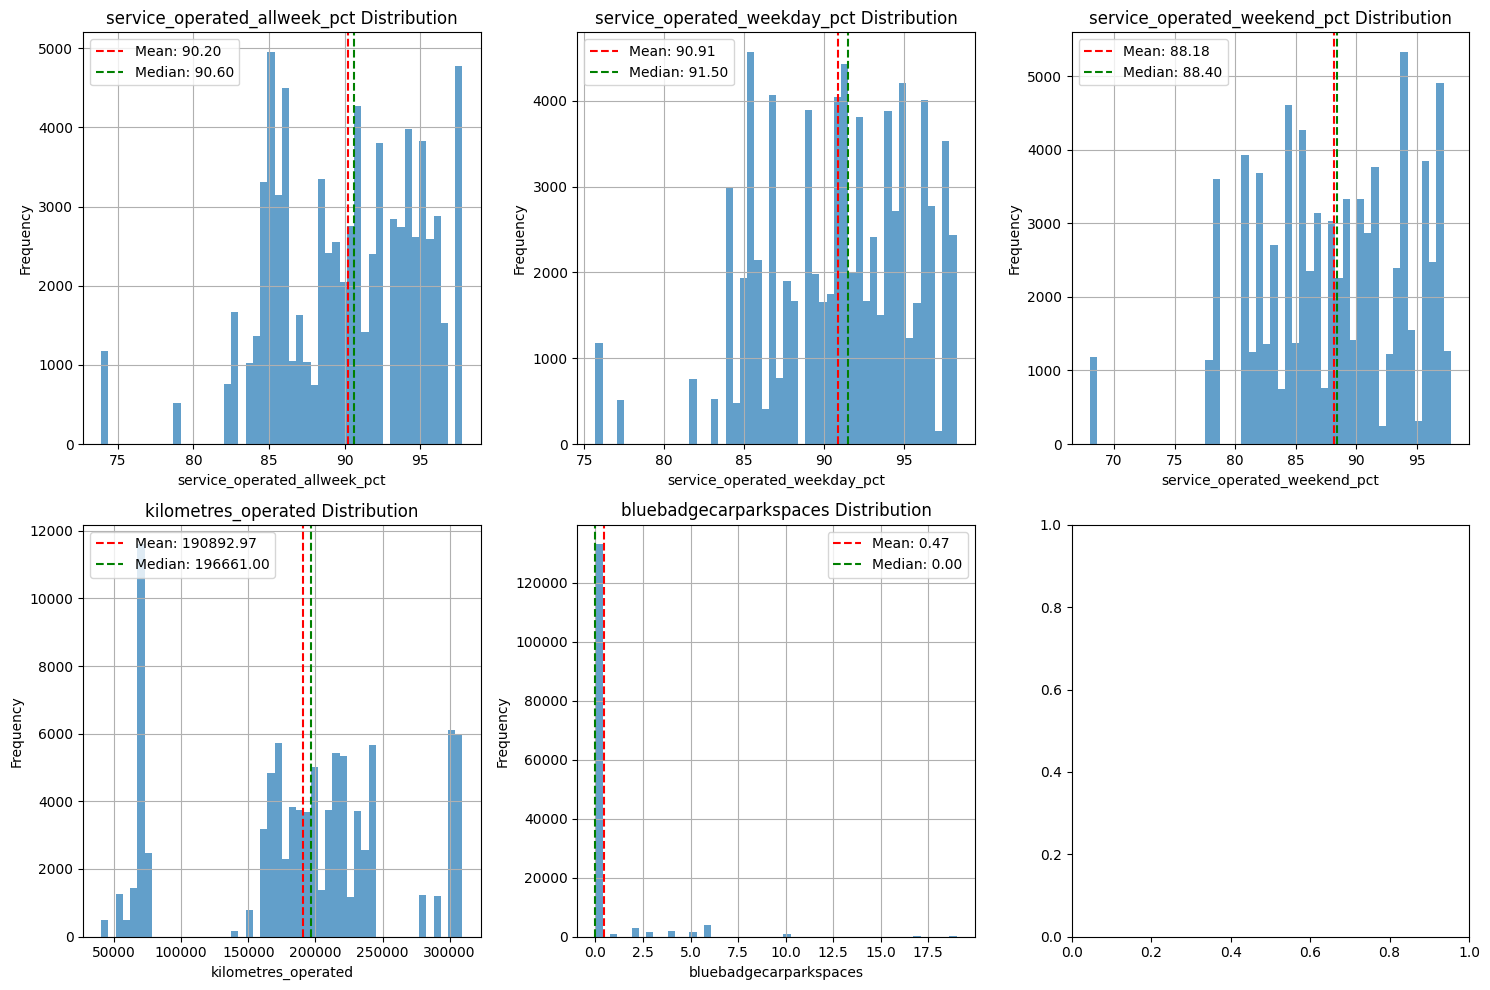

In [43]:
# Visualize distributions to help decide between mean and median
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, field in enumerate(numeric_fields):
    if field in df.columns and i < len(axes):
        # Plot histogram
        df[field].hist(bins=50, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'{field} Distribution')
        axes[i].set_xlabel(field)
        axes[i].set_ylabel('Frequency')
        
        # Add mean and median lines
        mean_val = df[field].mean()
        median_val = df[field].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        axes[i].legend()

plt.tight_layout()
plt.show()


In [44]:
# Fill null values based on analysis
# Using median for highly skewed data, mean for relatively normal data

fill_strategies = {}

for field in numeric_fields:
    if field in df.columns:
        skewness = df[field].skew()
        
        if abs(skewness) > 1:  # Highly skewed - use median
            fill_value = df[field].median()
            strategy = 'median'
        else:  # Relatively normal - use mean
            fill_value = df[field].mean()
            strategy = 'mean'
        
        fill_strategies[field] = {'value': fill_value, 'strategy': strategy}
        
        # Fill null values
        null_count_before = df[field].isnull().sum()
        df[field] = df[field].fillna(fill_value)
        null_count_after = df[field].isnull().sum()
        
        print(f"{field}: Filled {null_count_before} null values with {strategy} = {fill_value:.2f}")
        print(f"  Null values after filling: {null_count_after}")

print("\nFill strategies summary:")
for field, info in fill_strategies.items():
    print(f"{field}: {info['strategy']} = {info['value']:.2f}")


service_operated_allweek_pct: Filled 67451 null values with mean = 90.20
  Null values after filling: 0
service_operated_weekday_pct: Filled 67451 null values with mean = 90.91
  Null values after filling: 0
service_operated_weekend_pct: Filled 67451 null values with mean = 88.18
  Null values after filling: 0
kilometres_operated: Filled 52615 null values with mean = 190892.97
  Null values after filling: 0
bluebadgecarparkspaces: Filled 364 null values with median = 0.00
  Null values after filling: 0

Fill strategies summary:
service_operated_allweek_pct: mean = 90.20
service_operated_weekday_pct: mean = 90.91
service_operated_weekend_pct: mean = 88.18
kilometres_operated: mean = 190892.97
bluebadgecarparkspaces: median = 0.00


## Summary of Data Preparation


In [48]:
# Summary of changes made
print("=== DATA PREPARATION SUMMARY ===")
print(f"Original dataset shape: {df_original.shape}")
print(f"Processed dataset shape: {df.shape}")
print(f"\n1. Dropped fields: {fields_to_drop}")
print(f"\n2. Date features created:")
print(f"   - year, month, day, day_of_year")
print(f"   - month_sin, month_cos (cyclical)")
print(f"   - day_of_year_sin, day_of_year_cos (cyclical)")
print(f"\n3. Boolean features created:")
print(f"   - is_weekend: {df['is_weekend'].sum()} weekend records")
print(f"   - is_event: {df['is_event'].sum()} event records")
print(f"\n4. Toilet fields filled with 'unknown' for null values")
print(f"\n5. Numeric fields filled with appropriate statistics:")
for field, info in fill_strategies.items():
    print(f"   - {field}: {info['strategy']} = {info['value']:.2f}")

print(f"\nFinal null values check:")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("✅ No null values remaining!")
else:
    print("⚠️ Remaining null values:")
    print(null_counts[null_counts > 0])


=== DATA PREPARATION SUMMARY ===
Original dataset shape: (147103, 32)
Processed dataset shape: (147103, 33)

1. Dropped fields: ['airportinterchange', 'hubnaptancode', 'station_name', 'mode', 'event_name', 'toilet_type']

2. Date features created:
   - year, month, day, day_of_year
   - month_sin, month_cos (cyclical)
   - day_of_year_sin, day_of_year_cos (cyclical)

3. Boolean features created:
   - is_weekend: 41885 weekend records
   - is_event: 4597 event records

4. Toilet fields filled with 'unknown' for null values

5. Numeric fields filled with appropriate statistics:
   - service_operated_allweek_pct: mean = 90.20
   - service_operated_weekday_pct: mean = 90.91
   - service_operated_weekend_pct: mean = 88.18
   - kilometres_operated: mean = 190892.97
   - bluebadgecarparkspaces: median = 0.00

Final null values check:
✅ No null values remaining!


In [50]:
# Display final dataset info
print("Final dataset info:")
print(df.info())
print(f"\nFinal columns: {df.columns.tolist()}")


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147103 entries, 0 to 147102
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   station_uid                   147103 non-null  object 
 1   line                          147103 non-null  object 
 2   farezones                     147103 non-null  object 
 3   entrytapcount                 147103 non-null  int64  
 4   exittapcount                  147103 non-null  int64  
 5   year                          147103 non-null  int32  
 6   month                         147103 non-null  int32  
 7   day                           147103 non-null  int32  
 8   day_of_year                   147103 non-null  int32  
 9   month_sin                     147103 non-null  float64
 10  month_cos                     147103 non-null  float64
 11  day_of_year_sin               147103 non-null  float64
 12  day_of_year_cos         

In [52]:
# Display first few rows of processed data
print("First few rows of processed data:")
df.head()

First few rows of processed data:


,station_uid,line,farezones,entrytapcount,exittapcount,year,month,day,day_of_year,month_sin,month_cos,day_of_year_sin,day_of_year_cos,is_weekend,is_event,expected_attendance,max_temp,min_temp,mean_temp,precipitation_amount,relative_humidity,cloud_cover,sunshine_duration,sea_level_pressure,service_operated_allweek_pct,service_operated_weekday_pct,service_operated_weekend_pct,kilometres_operated,wifi,bluebadgecarparking,bluebadgecarparkspaces,toilet_isaccessible,toilet_isfeecharged
0,910GACTNCTL,mildmay,3,779,709,2023,1,1,1,0.5,0.866025,0.017213,0.999852,True,0,0.0,13.4,5.2,7.2,4.6,81.0,7.0,0.0,1008.0,90.201755,90.905127,88.184147,190892.969975,True,False,0.0,unknown,unknown
1,910GACTNCTL,mildmay,3,1077,1135,2023,1,2,2,0.5,0.866025,0.034422,0.999407,False,0,0.0,13.4,5.2,7.2,0.4,86.0,3.0,5.2,1016.9,90.201755,90.905127,88.184147,190892.969975,True,False,0.0,unknown,unknown
2,910GACTNCTL,mildmay,3,735,597,2023,1,3,3,0.5,0.866025,0.051620,0.998667,False,0,0.0,13.9,2.1,7.8,3.0,93.0,7.0,0.0,1018.6,90.201755,90.905127,88.184147,190892.969975,True,False,0.0,unknown,unknown
3,910GACTNCTL,mildmay,3,818,735,2023,1,4,4,0.5,0.866025,0.068802,0.997630,False,0,0.0,13.5,9.2,11.6,0.2,82.0,6.0,0.4,1014.6,90.201755,90.905127,88.184147,190892.969975,True,False,0.0,unknown,unknown
4,910GACTNCTL,mildmay,3,1237,1247,2023,1,5,5,0.5,0.866025,0.085965,0.996298,False,0,0.0,12.7,8.9,11.2,2.4,82.0,8.0,0.4,1018.6,90.201755,90.905127,88.184147,190892.969975,True,False,0.0,unknown,unknown


## Save Processed Data (Optional)


In [55]:
# Uncomment to save the processed data
df.to_csv('../data/processed/passengers_enriched_2023_prepared.csv', index=False)
print("Processed data saved to '../data/processed/passengers_enriched_2023_prepared.csv'")


Processed data saved to '../data/processed/passengers_enriched_2023_prepared.csv'
